### Importação dos dados



In [21]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/CidQueiroz/challenge_alurastore/refs/heads/main/loja_1.csv"
url2 = "https://raw.githubusercontent.com/CidQueiroz/challenge_alurastore/refs/heads/main/loja_2.csv"
url3 = "https://raw.githubusercontent.com/CidQueiroz/challenge_alurastore/refs/heads/main/loja_3.csv"
url4 = "https://raw.githubusercontent.com/CidQueiroz/challenge_alurastore/refs/heads/main/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()
loja2.head()
loja3.head()
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [22]:
import matplotlib.pyplot as plt

# 1. Análise do faturamento - Qual loja está faturando mais?
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print("=== FATURAMENTO POR LOJA ===")
print(f"Loja 1: R$ {faturamento_loja1:.2f}")
print(f"Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Loja 4: R$ {faturamento_loja4:.2f}")

=== FATURAMENTO POR LOJA ===
Loja 1: R$ 1534509.12
Loja 2: R$ 1488459.06
Loja 3: R$ 1464025.03
Loja 4: R$ 1384497.58


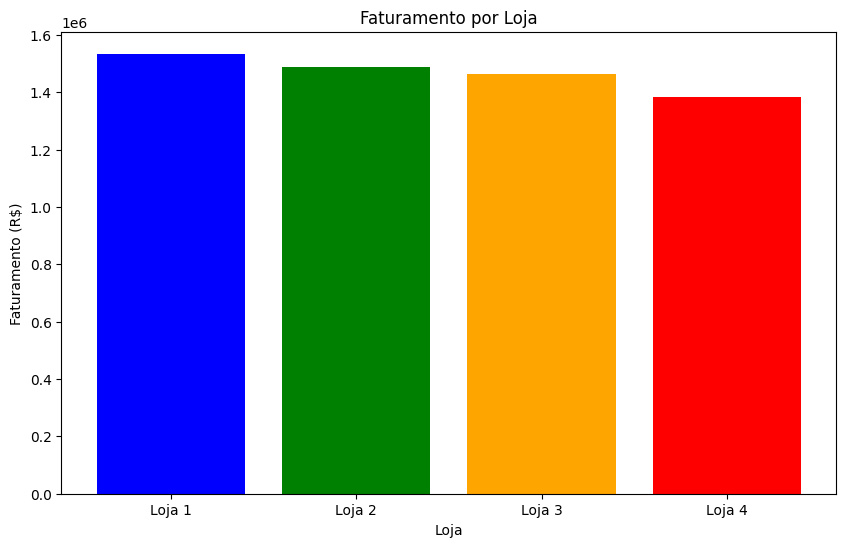

In [23]:
# Criando um gráfico de barras
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color=['blue', 'green', 'orange', 'red'])
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.show()
plt.close()

# 2. Vendas por Categoria


In [24]:
# 2. Vendas por Categoria - Quais categorias vendem mais em cada loja?
# Loja 1
vendas_cat_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print("\n=== VENDAS POR CATEGORIA - LOJA 1 ===")
print(vendas_cat_loja1)


=== VENDAS POR CATEGORIA - LOJA 1 ===
Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64


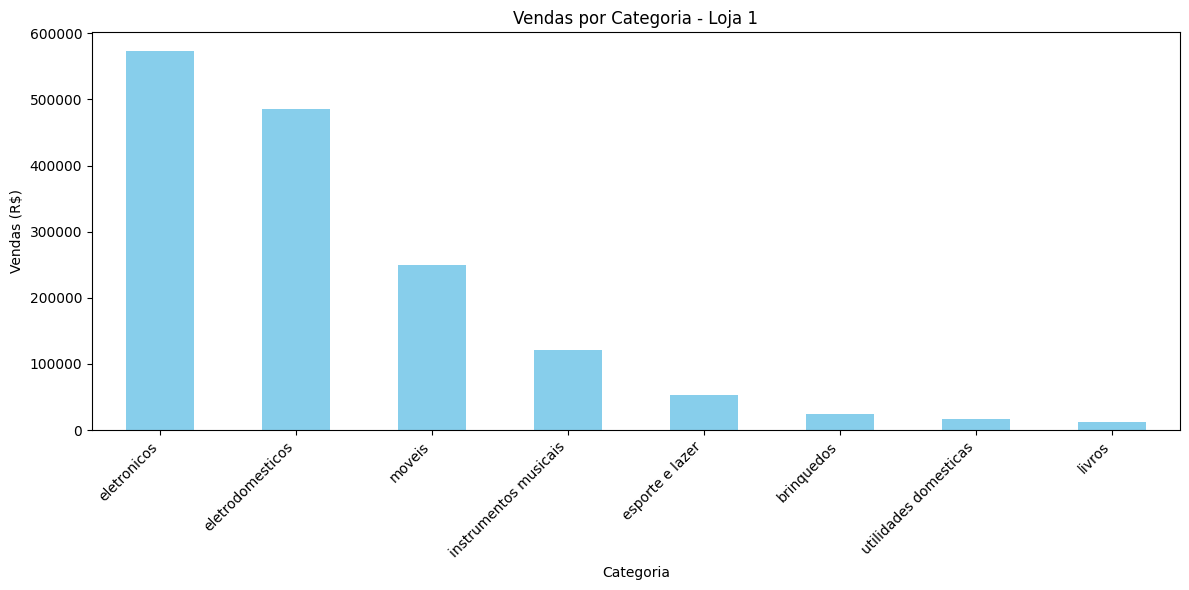

In [25]:
plt.figure(figsize=(12, 6))
vendas_cat_loja1.plot(kind='bar', color='skyblue')
plt.title('Vendas por Categoria - Loja 1')
plt.xlabel('Categoria')
plt.ylabel('Vendas (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

# 3. Média de Avaliação das Lojas

In [26]:
# 3. Média de Avaliação das Lojas - Qual loja tem a melhor avaliação?
avaliacao_loja1 = loja1['Avaliação da compra'].mean()
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()

print("\n=== MÉDIA DE AVALIAÇÃO POR LOJA ===")
print(f"Loja 1: {avaliacao_loja1:.2f}")
print(f"Loja 2: {avaliacao_loja2:.2f}")
print(f"Loja 3: {avaliacao_loja3:.2f}")
print(f"Loja 4: {avaliacao_loja4:.2f}")


=== MÉDIA DE AVALIAÇÃO POR LOJA ===
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


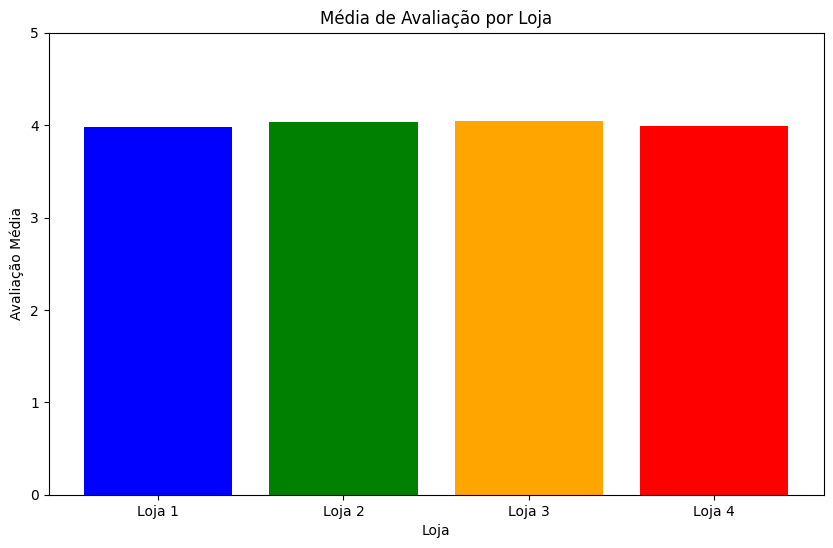

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(lojas, [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4],
        color=['blue', 'green', 'orange', 'red'])
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.ylim(0, 5)  # Escala de avaliação de 0 a 5
plt.show()
plt.close()

# 4. Produtos Mais e Menos Vendidos

In [28]:
# 4. Produtos Mais e Menos Vendidos - Quais são os produtos mais populares?
# Juntando todos os dados para análise geral
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

# Contando a frequência de cada produto
contagem_produtos = todas_lojas['Produto'].value_counts()

print("\n=== 5 PRODUTOS MAIS VENDIDOS ===")
print(contagem_produtos.head(5))

print("\n=== 5 PRODUTOS MENOS VENDIDOS ===")
print(contagem_produtos.tail(5))


=== 5 PRODUTOS MAIS VENDIDOS ===
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64

=== 5 PRODUTOS MENOS VENDIDOS ===
Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


In [29]:
plt.figure(figsize=(12, 6))
contagem_produtos.head(10).plot(kind='barh', color='lightgreen')
plt.title('10 Produtos Mais Vendidos')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')
plt.tight_layout()
plt.savefig('produtos_mais_vendidos.png')
plt.close()

# 5. Frete Médio por Loja


In [30]:
# 5. Frete Médio por Loja - Qual loja tem o menor custo de frete?
frete_loja1 = loja1['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

print("\n=== FRETE MÉDIO POR LOJA ===")
print(f"Loja 1: R$ {frete_loja1:.2f}")
print(f"Loja 2: R$ {frete_loja2:.2f}")
print(f"Loja 3: R$ {frete_loja3:.2f}")
print(f"Loja 4: R$ {frete_loja4:.2f}")


=== FRETE MÉDIO POR LOJA ===
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


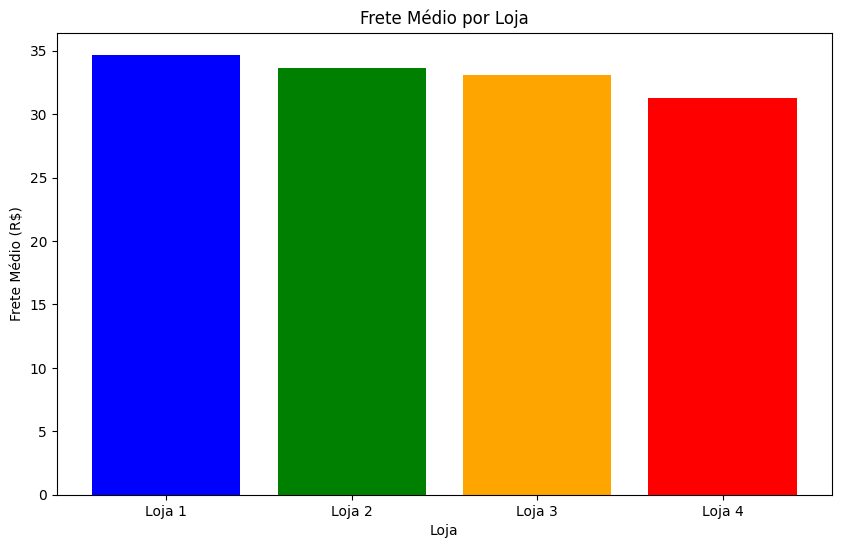

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(lojas, [frete_loja1, frete_loja2, frete_loja3, frete_loja4],
        color=['blue', 'green', 'orange', 'red'])
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.show()
plt.close()